## 4-4. 심층 신경망

### 프로그래밍 환경

딥러닝은 실기 시험 영역에는 포함되어 있지 않습니다.

인공신경망부터 예시들은 Tensorflow 2.X 라이브러리가 추가됩니다.

DS Level 3 에서는 딥러닝은 이론만 시험 범위에 해당 됩니다.

시험에는 Tensorflow를 사용할 상황은 **절대** 없습니다.

Tensorflow로 구성된 실습 예제를 이해할 정도의 내용만 Tensorflow 소개 형식의 가이드만을 남깁니다.

모든 실습 내용은 [Google Colab](https://colab.research.google.com/)에서 작성되었습니다.

자체 tensorflow 라이브러리를 지니고 계신다면, 사용하실 수 있지만, 버젼 차이로 인한 소스의 수정이 필요할 수 있습니다.

Colab에서 실습 내용을 여러 번 실행시키다보면, Colab에서 제공하는 리소스를 초과해서 사용할 수 있습니다.

이 경우 Colab 세션이 강제적으로 재시작 되어 초기화 될 수 있습니다.

이 점을 염두하시길 바랍니다.

### import 

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

for i in [pd, np, sklearn, mpl, sns]:
    print(i.__name__, i.__version__)

pandas 2.2.3
numpy 2.1.3
sklearn 1.6.1
matplotlib 3.10.1
seaborn 0.13.2


### 예제 데이터셋 준비

In [3]:
!gdown 1I4cKafcd_juZQ-AgVsgcteCVs9E5rmNE
!gdown 1wz4X5-Shb104ShWP6Gvnk1poNDPSps-T

Downloading...
From: https://drive.google.com/uc?id=1I4cKafcd_juZQ-AgVsgcteCVs9E5rmNE
To: /mnt/d/work/lecture/DS_Lv3_elearning/ni.jpg
100%|███████████████████████████████████████| 27.2k/27.2k [00:00<00:00, 447kB/s]
Downloading...
From: https://drive.google.com/uc?id=1wz4X5-Shb104ShWP6Gvnk1poNDPSps-T
To: /mnt/d/work/lecture/DS_Lv3_elearning/go.jpg
100%|███████████████████████████████████████| 56.9k/56.9k [00:00<00:00, 530kB/s]


### 1. 심층 신경망

#### 특징

- 다수의 은닉층

> 층이 깊어질수록 입력과 출력 사이의 복잡한 관계를 단계적으로 추상화
> 
> 충분한 데이터가 주어진 다면, 고차원 문제에서 높은 정확도를 보임
> 
> 층이 높아질수록 학습이 어려워짐

- 해석 가능성 문제(Black-box nature)

> 결과에 대한 직접적 설명이 어려움

- 재사용성

> 사전학습(Pre-train): 대규모 범용 데이터에서 일반적 표현 학습
> 
> 미세 조정(Fine-tuning): 대규모 데이터에서 학습된 신경망을 특정 목적에 맞게 조정

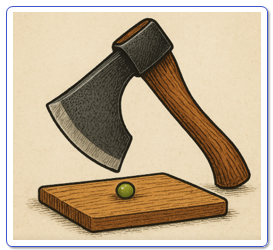

### 심층 신경망의 구조적 확장

#### AlexNet

- 2012 년 ILSVRC(ImageNet Large Scale Visual Recognition Challenge)에서 우승
> (에러율 기준으로 2 위와 10% 이상의 큰 격차로 우승)
- 당시 비전(Vision) 분야에서 이전의 전통적인 방법들을 능가해 신경망 연구의 부흥을 일으킴
- 10 년 전에 등장한 LeNet 의 구조를 이어받아 당시로서는 혁신적으로 큰 신경망 사용
- 활성화 함수 ReLU 의 사용으로 기울기 소실 현상 감소
- 데이터 증강(Data augmentation)을 활용하여 일반화 강화
- Drop-out 을 사용하여 과적합에 대응
- GPU 활용: 2 개의 GPU 를 통한 병렬 처리

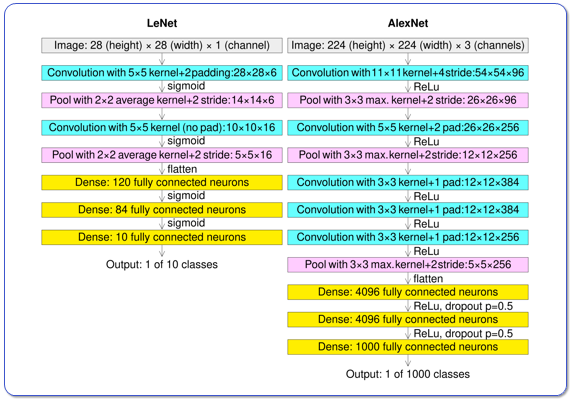

#### VGGNets

- ILSVRC 2014 이미지 위치 지정 부문에서 우승
- 작은 필터(3×3)를 반복하여 깊은 신경망 구성
> 효과적인 특징 추출을 위해 필터 크기를 줄이는 대신 깊은 신경망을 구성하여 비선형성을 높임
- 단순한 구조로 연구에서 많이 사용
- 쌓아 올린 VGG 블록 수에 따라 VGG-16 과 VGG-19 로 구분

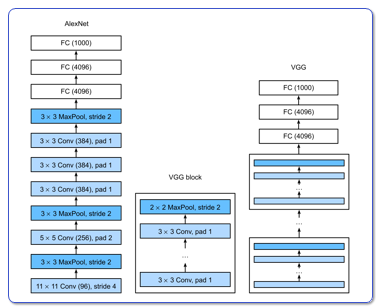

|   | VGG-16 | VGG-19 |
| --- | --- | --- |
| VGG 블록수 | 13 | 16 |
| 밀도레이어 | 3 | 3 |
| 총 파라미터수 | 138M | 143M |


#### GoogLeNet(Inception)

- ILSVRC 2014 이미지 분류 부문에서 우승
- 적은 수의 파라미터로 강력한 성능을 구현

> Inception 블록: 동일한 입력을 다양한 크기 필터의 합성곱에 결합시킨 블록
> 
> Inception V1: 모수 5M 개

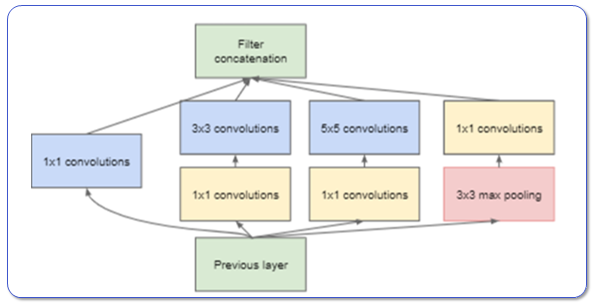

- 1×1 컨볼루션
> 채널 방향의 연산을 통해 채널수를 줄여 연산량은 줄이고 정보를 통합
>
> 네트워크 깊이 증가
>
> 병렬 구조의 컨볼루션 구성

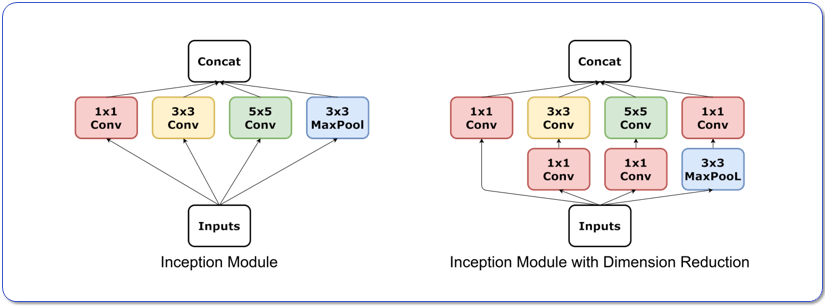

출처 : https://en.wikipedia.org/wiki/Inception_(deep_learning_architecture)

- 보조 중간 출력 레이어 사용
> 기울기 소실 현상을 완 화시키기 위해 사용

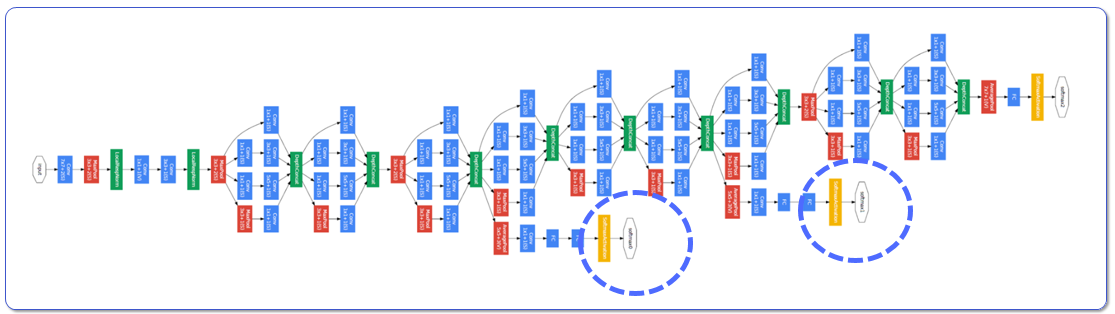

#### ResNet
- ILSVRC 2015 에서 압도적인 성능 차이로 우승

- 잔차 연결(Residual Connection)

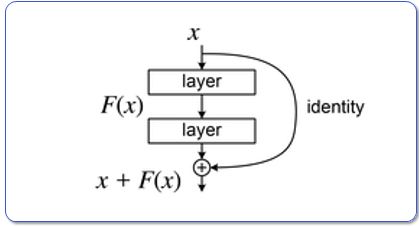

- $F(x)$는 x가 학습하지 못한 차이만큼만 학습하도록 하여 학습이 쉽고 안정적으로 됨

> $\Rightarrow$ 수백 층 까지 획기적으로 깊은 층을 구성할 수 있게 됨


#### 배치 정규화(Batch normalization)

- 배치 단위로 평균과 분산을 구해 출력 변수들이 동일한 평균과 분산을 갖게 함

$\hat{𝐱}=\frac{𝐱−\mu}{\sqrt{\sigma^2 + \epsilon}}$

$\mathbf{\mu}, \mathbf{\sigma}$: 배치에서의 평균과 분산

$\Rightarrow$ 스케일 & 시프트

$\mathbf{y}=\gamma \times \hat{x} + \mathbf{\beta}$

$\Rightarrow$ 기울기 소실 완화

####  연산의 과정: 학습

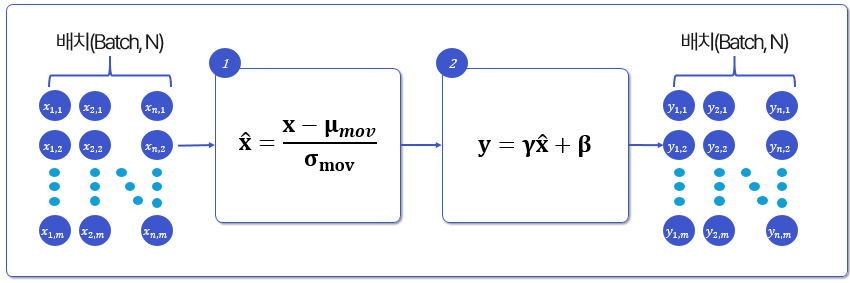

####  연산의 과정: 학습

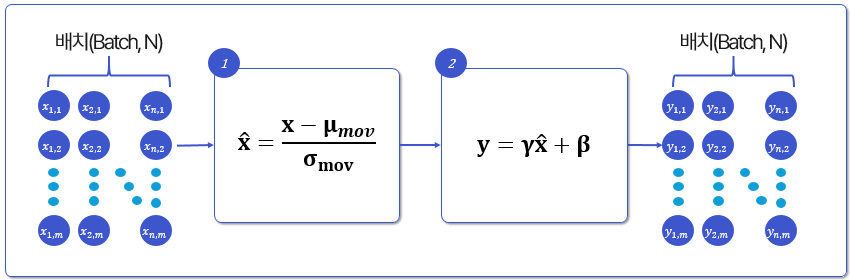

#### Word2Vec

- 단어의 의미를 반영하는 벡터 표현을 학습하는 신경망 모델
- 임베딩 레이어

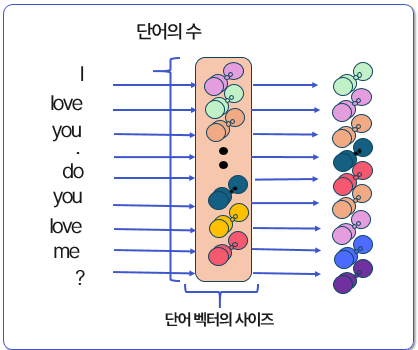

- CBOW

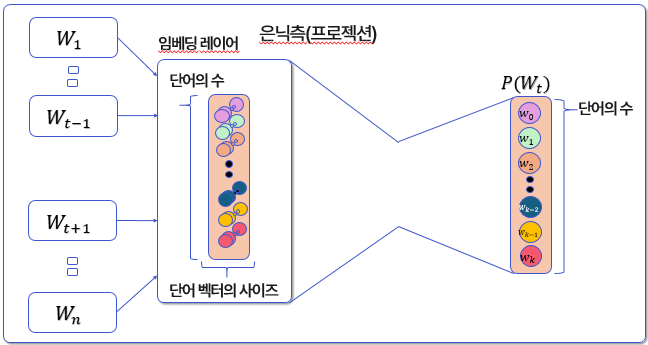

- Skip-gram

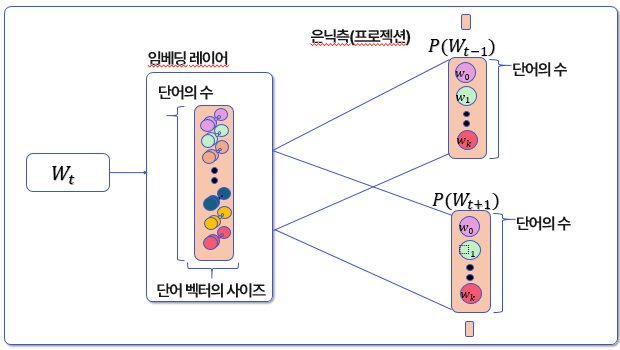

- CBOW vs Skip-gram

|   | CBOW | Skip-gram |
| --- | --- | --- |
| 입력 | 주변 단어들 | 중심 단어 |
| 출력 | 중심 단어 | 주변 단어들 |
| 특징 | 희귀 단어를 잘 학습하지 못함<br/>학습이 빠름 | 희귀 단어를 잘 표현함<br/>학습이 오래 걸림 |


### 3. 특징 계층 구조
- 입력 계층에서 출력 계층으로 갈수록 추상적 패턴을 나타냄
- “A Neural Algorithm of Artistic Style“ 논문 중 이미지의 스타일과 내용 결합 시도

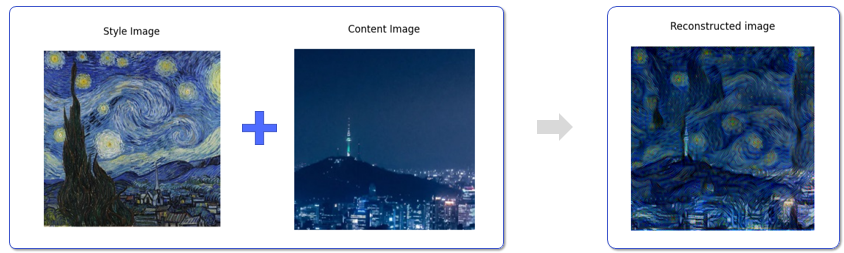

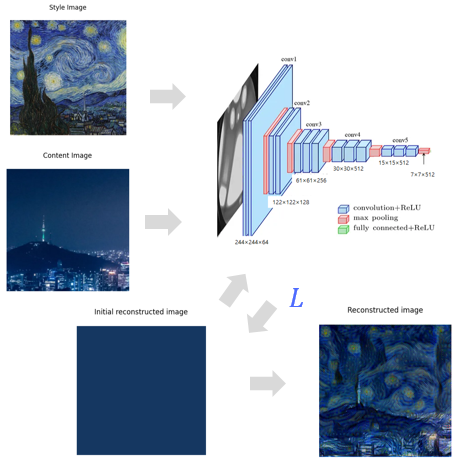

### 층별 역할을 파악하기 위한 설정

$C^l$ : l 번째 합성곱 블럭에서 Content Image의 출력

$S^l$ : l 번째 합성곱 블럭에서 Style Image의 출력

$R^l$ : l 번째 합성곱 블럭에서 복원 이미지의 출력

$L_{content}^l = \frac{1}{PC} \sum_{i=1}^{P} \sum_{j=1}^{C} (C_{ij}^l - R_{ij}^l)^2$ $P$ : 픽셀수 $C$ : 채널수

$G_{i,j}^l = \frac{1}{C} \sum_{k=1}^{C} S_{ik}^l S_{jk}^l$ $A_{i,j}^l = \frac{1}{C} \sum_{k=1}^{C} R_{ik}^l R_{jk}^l$

$L_{style}^l = \frac{1}{4P^2} \sum_{i,j} (G_{ij} - A_{ij})^2$

$L = \mathbf{w}_{\mathbf{content}}^T \cdot \mathbf{L}_{\mathbf{content}} + \mathbf{w}_{\mathbf{style}}^T \cdot \mathbf{L}_{\mathbf{style}}$

> $𝐿_𝑐𝑜𝑛𝑡𝑒𝑛𝑡^𝑙$ 을 이용한 복원 이미지

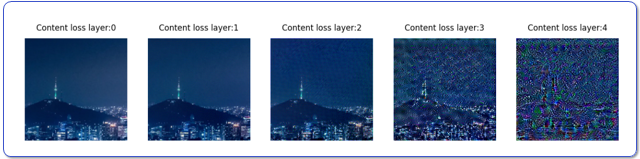

> $𝐿_𝑠𝑡𝑦𝑙𝑒^𝑙$의 가중치에 따른 복원 이미지

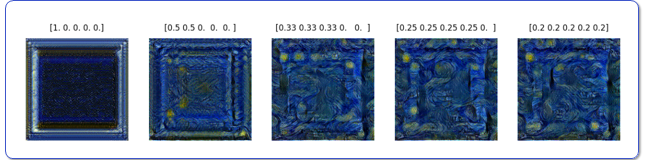

### 4. 오토인코더

#### 구성
- 인코더(Encoder): 데이터를 잠재 공간(latent space)으로 인코딩
- 디코더(Decoder): 인코딩된 데이터를 원래 데이터로 디코딩

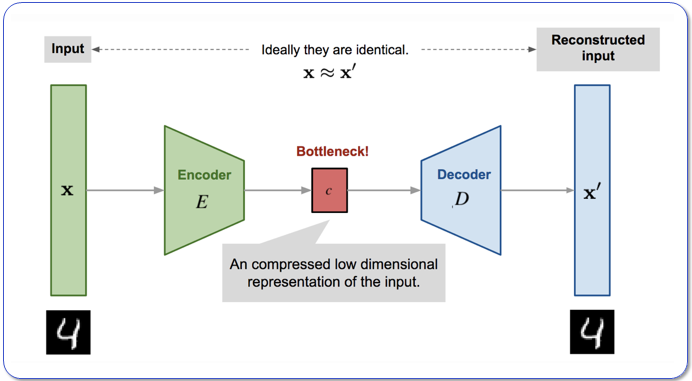

$\Rightarrow$ 차원이 낮은 잠재 공간으로 인코딩하는 과정에서 데이터의 주요 특징을 학습

출처: https://lilianweng.github.io/posts/2018-08-12-vae/

#### 학습

$𝐜=𝐸(𝐱)$

$𝐱′=𝐷(𝐜)$

$𝐿(𝐱, 𝐱')=||𝐱−𝐱'||^2$



#### 활용

- 차원 축소 (Dimension reduction)
- 노이즈 제거 (Denoising)
- 이상 탐지 (Outlier Detection)
- 사전 학습 (Pre –train)

#### 잡음 제거 오토인코더(Denoising Autoencoder)

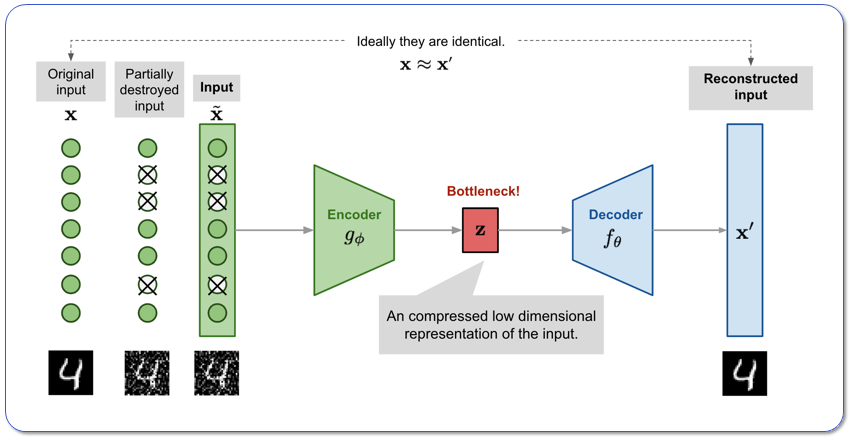

### 5. GAN(Generative Adversarial Network)
#### 구성 및 원리

- 생성자(Generator): 가짜 데이터를 생성
- 판별자(Discriminator): 진짜와 가짜를 구분
$\Rightarrow$ 생성자 는 구분자가 진짜와 가짜를 구분하지 못하게,  판별자 는 진짜와 가짜를 잘 구분할 수 있게 학습

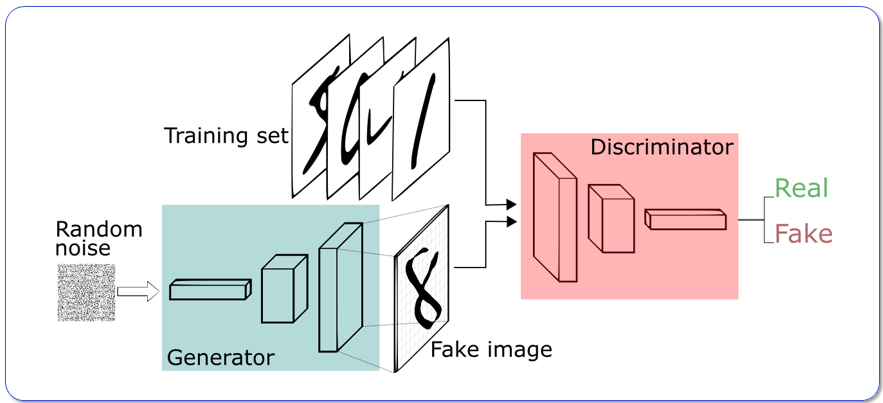

#### 학습
- 학습대상: G: 생성자(Generator), D: 판별자(Discriminator)
- 과정
1. G, D 초기화
2. G 고정, D 학습
> 진짜 데이터 샘플: $x \sim p_train$
> 
> 가짜 데이터 생성: $z \sim p_z(z), \hat{x}=G(z)$
>
> $\Rightarrow$ $L_D = -E_{x \sim p_{train}}[\log(D(x))] - E_{z \sim p_z(z)}[\log(1 - D(G(z)))]$
3. G 학습, D 고정
> 진짜 데이터 샘플: $x \sim p_train$
>
> 가짜 데이터 생성: $z \sim p_z(z), \hat{x}=G(z)$
>
> $\Rightarrow$ $L_G = -E_{z \sim p_z(z)}[\log(D(G(z)))]$
4. 종료 조건을 만족할 때까지 2부터 반복

#### 용도
- 데이터 증강
- 도메인 전이
- 이미지 복원
- 사전 학습(Pre –train)
- 분류 성능 강화

### 6. 사전 학습과 전이 학습

#### 사전 학습(Pre-train)
- 모델을 실제 데이터로 학습시키기 전에 대규모 일반 데이터로 먼저 학습시키는 것
- 개념 정리

|   | 설명 |
| --- | --- |
| 목적 | 대규모 데이터에서 학습된 일반화된 표현을 다양한 태스크에 활용 |
| 데이터 | 대규모 일반 도메인 (ex. ImageNet, Wikipedia...) |
| 방법 | 라벨이 있다면 지도학습, 없다면 비지도학습 |
| 결과물 | 잘 훈련된 백본(backbone) / 속성 추출 네트워크 |


#### 전이 학습(Transfer Learning)
- 기존에 학습된 모델을 기반으로, 새로운 데이터와 태스크에 맞게 추가 학습
- 개념 정리
|   | 설명 |
| --- | --- |
| 목적 | 대규모 데이터에서 학습된 모델의 표현력을 활용하여 일반화 성능 강화 |
| 방법 | 기존 모델에서 하위 계층을 가져오고, 상위 계층은 재설계 또는 재설정 |
| 데이터 | 도메인 특화 |
| 결과물 | 태스크에 최적화된 모델 |


#### 미세 조정(Fine Tuning)
- 방법: 하위 모델의 고정을 풀고 낮은 학습율로 추가 학습을 진행
- 사전 학습 모델을 태스크에 맞게 정밀 조정

**[Ex.1]**

VGG-16 모델을 이용하여 개와 고양이를 구분하는 분류기를 만듭니다.

Tensorflow Dataset에서 제공하는 고양이와 개 이미지 데이터셋 전체 데이터 중에

학습데이터를 40%, 검증데이터를 10%, 평가데이터 10%로 사용합니다.

Keras 사전학습 저장소에는 VGG-16 모델 사전학습된 모델이 있습니다.

초기 부터 학습한 모델과 사전학습한 모델을 전이 학습 기법을 사용하여 학습한 모델의

학습 상황과 성능을 비교해봅니다.

여기서 한 단계 더 나아가 전이 학습된 모델을 미세 조정을 합니다.


In [10]:
# 불필요한 경고 메세지가 너무 많이 나와서 내용 파악에 어려움이 있어
# Tensorflow에서 출력하는 경고 메세지를 보이지 않게 조정합니다.
# 개발 단계에서는 비활성화 시키지 않는 것을 권장드립니다.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
import tensorflow_datasets as tfds

# GPU가 있다면, GPU 메모리를 최대한 활용할 수 있도록 설정합니다.
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print("{} Physical GPUs, {} Logical GPUs".format(len(gpus), len(logical_gpus)))
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


In [8]:
ds_train, ds_val, ds_test = tfds.load(
    "cats_vs_dogs",
    # Reserve 10% for validation and 10% for test
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True,  # Include labels
)

print(f"Number of training samples: {ds_train.cardinality()}")
print(f"Number of validation samples: {ds_val.cardinality()}")
print(f"Number of test samples: {ds_test.cardinality()}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

2025-11-16 23:37:22.681763: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-16 23:37:22.690815: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763303842.700938   39660 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763303842.704281   39660 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763303842.712557   39660 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Shuffling /home/sun9sun9/tensorflow_datasets/cats_vs_dogs/incomplete.XG4578_4.0.1/cats_vs_dogs-train.tfrecord*…

Dataset cats_vs_dogs downloaded and prepared to /home/sun9sun9/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Number of training samples: 9305
Number of validation samples: 2326
Number of test samples: 2326


2025-11-16 23:38:04.786079: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


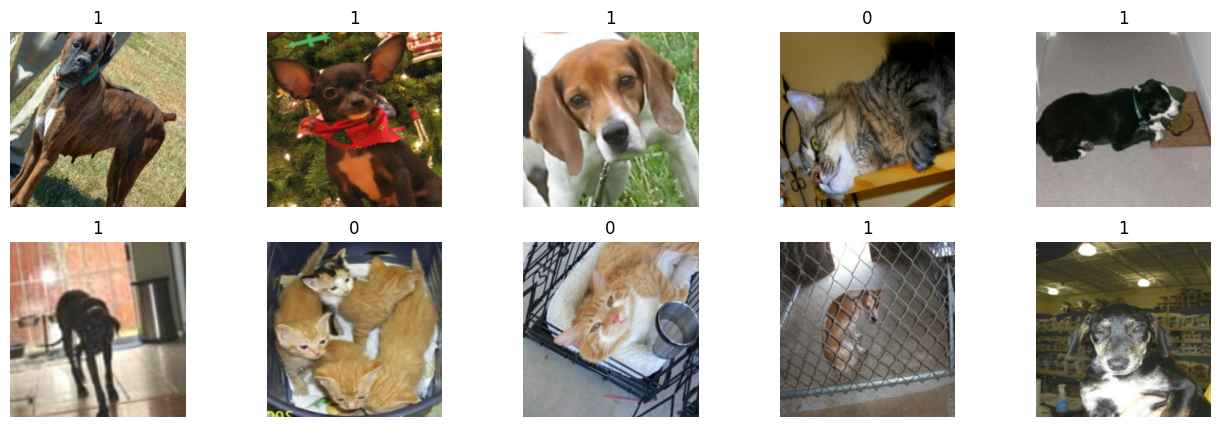

In [11]:
# VGG16의 입력 사이즈인 244×244의 이미지로 바꾸어 줍니다.
resize_fn = tf.keras.layers.Resizing(244, 244)
ds_train = ds_train.map(lambda x, y: (resize_fn(x), y))
ds_val = ds_val.map(lambda x, y: (resize_fn(x), y))
ds_test = ds_test.map(lambda x, y: (resize_fn(x), y))

# 분류기가 더욱 강인한 성능을 낼 수 있도록 이미지에 회전 변환과 플립 변환된 이미지를 임의로 넣어 줍니다.
aug_layers = [tf.keras.layers.RandomFlip("horizontal"), tf.keras.layers.RandomRotation(0.1)]
def data_aug(x):
    for layer in aug_layers:
        x = layer(x)
    return x
ds_train = ds_train.map(lambda x, y: (data_aug(x), y))

fig, axes = plt.subplots(2, 5, figsize=(16, 5))
for ax,(image, label) in zip(axes.ravel(), ds_train.take(10)):
    ax.imshow(image.numpy().astype(int))
    ax.set_title(int(label))
    ax.axis('off')

In [12]:
tf.keras.backend.clear_session()
def create_block(n_conv,n_channel):
    """
    VGG-16에 하나의 컨볼루션 블록을 만들어 즙니다.
    Parameters
        n_conv: int
            컨볼루션 층의 개수
        n_channel: int
            출력 채널 수입니다.
    Returns
        list
            n_channel 출력 채널인 Conv2D n_conv 개와 2x2 MaxPooling2D 층
    """
    return [
        tf.keras.layers.Conv2D(n_channel, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="HeNormal")
        for _ in range(n_conv)
    ] + [tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2))]

# Keras가 제공하는 VGG16는 244×244×3 입니다.
net = [tf.keras.Input(shape=(244, 244, 3))]
# VGG의 컨볼루션 블럭을 생성합니다.
for n_conv, n_channel in [(2, 64), (2, 128), (3, 256), (3, 512), (3, 512)]:
    net = net + create_block(n_conv, n_channel)

# Fully Connected Layer 를 추가합니다.
net = net + [
    tf.keras.layers.GlobalAveragePooling2D(), # Global Average Pooling은 7x7x512 출력을  7x7 영역을 모두 평균을 내어 512의 벡터로 만듭니다.
    tf.keras.layers.Dense(16, activation='relu', kernel_initializer="HeNormal"),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer="GlorotNormal")
]
vgg16 = tf.keras.models.Sequential(net)

# 직접학습을 해보려면, load_result = False로 두면 아래 학습 루틴이 실행됩니다.
# GPU 연산 체계가 없다면, 상당한 시간이 걸리니, 이 점 염두해 두 시길 바랍니다.
# load_result = True로 하면 기존에 학습된 내용을 불러옵니다.
load_result = True
if not load_result:
    # 초기 상태부터 VGG16을 학습시킵니다.
    vgg16.compile(
        optimizer=tf.keras.optimizers.Adam(1e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=['accuracy']
    )

    train_hist_vgg = vgg16.fit(
        ds_train.shuffle(1000).batch(16).prefetch(tf.data.AUTOTUNE).cache(),
        validation_data=ds_val.batch(16).prefetch(tf.data.AUTOTUNE).cache(),
        epochs=30
    )

    # 가중치와 학습이력을 기록합니다.
    hist_vgg = train_hist_vgg.history
    with open('vgg16_trained.pkl', 'wb') as f:
        pickle.dump({
            'weights': vgg16.get_weights(),
            'train_hist': hist_vgg
        },  f)
else:
    # 학습 결과가 들어 있는 파일을 다운로드 받습니다.
    if not os.path.isfile('vgg16_trained.pkl'):
        !gdown 1Y7RHZy-3g6bFoIby0OuajFQI2cgjAxXz
    with open('vgg16_trained.pkl', 'rb') as f:
        cont = pickle.load(f)
    vgg16.set_weights(cont['weights'])
    hist_vgg = cont['train_hist']
    del cont

Downloading...
From: https://drive.google.com/uc?id=1Y7RHZy-3g6bFoIby0OuajFQI2cgjAxXz
To: /mnt/d/work/lecture/DS_Lv3_elearning/vgg16_trained.pkl
100%|██████████████████████████████████████| 58.9M/58.9M [00:03<00:00, 16.6MB/s]


NameError: name 'pickle' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
# 평가데이터로 정확도를 확인합니다.
accuracy_score(np.array(list(ds_test.map(lambda x, y: y))),
               np.squeeze(vgg16.predict(ds_test.batch(32))) > 0.5)

In [ ]:
import keras
# Keras 아카이브에 있는 VGG16 신경망을 가져옵니다.
vgg16_pretrain = keras.applications.VGG16(
    include_top=False, # 상위에 있는 Fully Connected는 제외합나다. 컨볼루션 블록들이 제공하는 속성 추출 기능을 활용합니다.
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
)

from keras.utils import plot_model
plot_model(vgg16_pretrain, rankdir='LR', dpi=72, show_shapes=True, show_layer_activations=True)

In [ ]:
# Keras 아카이브에 있는 VGG16 신경만을 사용하여 모델을 구성합니다.
tf.keras.backend.clear_session()
vgg16_pretrain.trainable = False
vgg16_tr = tf.keras.models.Sequential([
    vgg16_pretrain, # 불러온 VGG 사전학습 모델을 배치합니다.
    tf.keras.layers.GlobalAveragePooling2D(), # Global Average Pooling은 7x7x512 출력을  7x7 영역을 모두 평균을 내어 512의 벡터로 만듭니다.
    tf.keras.layers.Dense(16, activation='relu', kernel_initializer="HeNormal"),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer="GlorotNormal")
])

In [ ]:
load_result = True
if not load_result:
    # 전이된 VGG16을 학습시킵니다.
    vgg16_tr.compile(
        optimizer=tf.keras.optimizers.Adam(1e-5),
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=['accuracy']
    )

    train_hist = vgg16_tr.fit(
        ds_train.shuffle(1000).batch(16).prefetch(tf.data.AUTOTUNE).cache(),
        validation_data=ds_val.batch(16).prefetch(tf.data.AUTOTUNE).cache(),
        epochs=30
    )
    # 가중치와 학습이력을 기록합니다.
    hist_vgg_tr = train_hist.history
    with open('vgg16_transfer_trained.pkl', 'wb') as f:
        pickle.dump({
            'weights': vgg16_tr.get_weights(),
            'train_hist': hist_vgg_tr
        },  f)
else:
    # 학습 결과가 들어 있는 파일을 다운로드 받습니다.
    if not os.path.isfile('vgg16_transfer_trained.pkl'):
        !gdown 16ggyzOBCd8UspXjJ5yzkLATF0dyUOiFS
    with open('vgg16_transfer_trained.pkl', 'rb') as f:
        cont = pickle.load(f)
    vgg16_tr.set_weights(cont['weights'])
    hist_vgg_tr = cont['train_hist']
    del cont

In [ ]:
from sklearn.metrics import accuracy_score
# 평가데이터로 정확도를 확인합니다.
accuracy_score(np.array(list(ds_test.map(lambda x, y: y))),
               np.squeeze(vgg16_tr.predict(ds_test.batch(32))) > 0.5)

In [ ]:
# 학습 그래프를 보고 학습의 진행 양상을 비교해봅니다.

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.ravel()
axes[0].plot(hist_vgg['loss'], label='train')
axes[0].plot(hist_vgg['val_loss'], label='valid.')
axes[0].set_title('Loss of VGG16 from scratch')

axes[1].plot(hist_vgg['accuracy'], label='train')
axes[1].plot(hist_vgg['val_accuracy'], label='valid.')
axes[1].set_title('Accuracy of VGG16 from scratch')

axes[2].plot(hist_vgg_tr['loss'], label='train')
axes[2].plot(hist_vgg_tr['val_loss'], label='valid.')
axes[2].set_title('Loss VGG16 transfer learned')

axes[3].plot(hist_vgg_tr['accuracy'], label='train')
axes[3].plot(hist_vgg_tr['val_accuracy'], label='valid.')
axes[3].set_title('Accuracy of VGG16 transfer learned')
for ax in axes:
    ax.legend()
    ax.set_xlabel('epoch')
plt.tight_layout()
plt.show()

In [ ]:
load_result = True
if not load_result:
    # 미세조정: 사전 학습된 모델의 학습 제한을 풀고 학습시킵니다.
    vgg16_pretrain.trainable = True
    vgg16_tr.compile(
        optimizer=tf.keras.optimizers.Adam(1e-6), # 미세조정 시에는 학습율을 더욱 낮춥니다.
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=['accuracy']
    )

    train_finetune_hist = vgg16_tr.fit(
        ds_train.shuffle(1000).batch(16).prefetch(tf.data.AUTOTUNE).cache(),
        validation_data=ds_val.batch(16).prefetch(tf.data.AUTOTUNE).cache(),
        epochs=5
    )
    # 가중치와 학습이력을 기록합니다.
    hist_vgg_fine = train_finetune_hist.history
    with open('vgg16_finetune_trained.pkl', 'wb') as f:
        pickle.dump({
            'weights': vgg16_tr.get_weights(),
            'train_hist': hist_vgg_fine
        },  f)
else:
    # 학습 결과가 들어 있는 파일을 다운로드 받습니다.
    if not os.path.isfile('vgg16_finetune_trained.pkl'):
        !gdown 1KB4eQTI5sArl9_sND6yMdCzSVEsOtLAQ
    with open('vgg16_finetune_trained.pkl', 'rb') as f:
        cont = pickle.load(f)
    vgg16_tr.set_weights(cont['weights'])
    hist_vgg_fine = cont['train_hist']

In [ ]:
from sklearn.metrics import accuracy_score
# 평가데이터로 정확도를 확인합니다.
accuracy_score(np.array(list(ds_test.map(lambda x, y: y))),
               np.squeeze(vgg16_tr.predict(ds_test.batch(32))) > 0.5)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].plot(hist_vgg_fine['loss'], label='train')
axes[0].plot(hist_vgg_fine['val_loss'], label='valid.')
axes[0].set_title('Loss of VGG16 fine-tuned')

axes[1].plot(hist_vgg_fine['accuracy'], label='train')
axes[1].plot(hist_vgg_fine['val_accuracy'], label='valid.')
axes[1].set_title('Accuracy of VGG16 fine-tuned')

for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 리소스를 삭제합니다.
del ds_train, ds_val, ds_test, vgg16, vgg16_tr

**[Ex.2]**

신경망 모델은 학습된 내용이 가중치 형태로 나타나기 때문에 어떻게 학습이 이루어졌는지 확인이 어렵습니다.

신경망의 학습한 내용에 어떤 특징을 보이는지 시도했던 것을 소개드립니다.

[A Neural Algorithm of Artistic Style](https://arxiv.org/abs/1508.06576)

이미지 심층신경망의 깊이에 따른 특성이 무엇인지를 확인할 수는 지를 보여줍니다.

두 개의 이미지에서 하나의 이미지에서는 내용을 다른 하나의 이미지에서는 스타일을 추출하여

두 개의 이미지를 합성하는 기법을 소개한 논문입니다.

낮은 깊이 층에서는 이미지의 구체적인 특징을 상위 층으로 갈 수록 전반적인 특징을 나타내고 있음을 보여줍니다.

두 가지 관점에서 복원을 시도합니다. 하나는 이미지의 내용을 복원하는 것과, 다른 하나는 이미지의 질감이나 색감을 나타내는 스타일을 복원하는 것입니다.

내용은 신경망의 출력을 통해 나타나고, 스타일은 컨볼루션의 채널간 출력의 공분산 행렬에 의해 나타낼수 있음을 알려줍니다.

> $F_{ij}^l$: l 컨볼루션 블록에서 **복원** 이미지의 출력, $P_{ij}^l$: l 컨볼루션 블록에서 **대상** 이미지의 출력
>
> 내용 손실: $L_{content} = \frac{1}{2}\sum_{i,j}\left(F_{ij}^l - P_{ij}^l\right)^2$
>
> $G_{i, j}^l = \sum_{k}F_{ik}^lF_{jk}^l$
>
> $A_{i, j}^l = \sum_{k}P_{ik}^lP_{jk}^l$
>
> $E_l = \frac{1}{4N^2_lM^2_l}\sum_{i,j}\left(G_{ij}^l - A_{ij}^l\right)^2$
>
> 스타일 손실: $L_{style} = \sum_{l=0}^L w_l E_l$

오류역전파를 통한 이미지 / 스타일의 복원을 방법을 소개드립니다.

나아가 두 개의 이미지에서 하나는 내용을 다른 하나는 스타일을 가져와서

또 다른 형태의 이미지를 만들어봅니다.


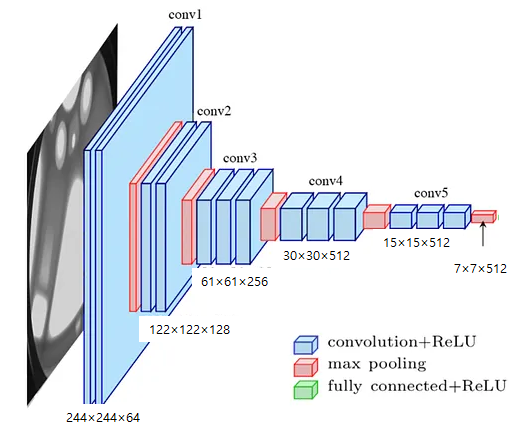

In [ ]:
class ReconstModel(tf.keras.Model):
    def __init__(self, vgg16_pretrained, rgb_mean = np.array([0, 0, 0])):
        super().__init__()
        # 복원 이미지 정보가 Weight 형태로 저장됩니다.
        # 오류 역전파에 의해 학습 됩니다.
        self.img_reconst = tf.Variable(shape=(244, 244, 3), initial_value=(np.zeros(shape=(244, 244, 3)) + rgb_mean))
        cnt, img_size = 0, 244
        self.cnn_blocks = list()
        n_input_channel = 3
        for n_conv, n_channel in [(2, 64), (2, 128), (3, 256), (3, 512), (3, 512)]:
            cnn_block = tf.keras.models.Sequential(create_block(n_conv, n_channel))
            cnn_block.build((0, img_size, img_size, n_input_channel))
            n_input_channel = n_channel
            for layer in cnn_block.layers:
                if len(layer.get_weights()) == 0:
                    continue
                while len(vgg16_pretrained.layers[cnt].get_weights()) == 0:
                    cnt += 1
                layer.set_weights(vgg16_pretrained.layers[cnt].get_weights())
                cnt += 1
            self.cnn_blocks.append(cnn_block)
            img_size = img_size // 2
            cnn_block.trainable = False

    def reconst(self):
        # 복원 이미지의 신경망 출력 값을 저장합니다.
        X = tf.expand_dims(self.img_reconst, axis=0)
        return self.call(X)

    def call(self, X, training=False):
        # 컨볼루션 블럭별로 출력값을 리스트에 쌓아서 반환합니다.
        ret = []

        for cnn_block in self.cnn_blocks:
            X = cnn_block(X, training=training)
            ret.append(X)
        return ret

    def get_image(self):
        return np.clip(self.img_reconst.numpy(), 0, 1)

    def reset_image(self, rgb_mean = np.array([0, 0, 0])):
        self.img_reconst.assign(np.zeros(shape=(244, 244, 3)) + rgb_mean)

In [ ]:
def content_loss(X_conv, X_reconst, l):
    """
    내용 손실을 계산합니다.
    Parameters
        X_conv - tf.Tensor
            원래 이미지의 컨볼루션 블럭별 출력값
        X_reconst - tf.Tensor
            복원 이미지의 컨볼루션 블럭별 출력값
    Returns
        float
            손실값
    """
    return tf.reduce_mean(tf.square(X_conv[l] - X_reconst[l]))

def style_loss(X_conv, X_reconst, weights=[0.2, 0.2, 0.2, 0.2, 0.2], channels = [64, 128, 256, 512, 512]):
    """
    스타일 손실을 계산합니다.
    Parameters
        weights - list
            층별 손실 가중치
        channels - list
            층별 채널수
    Returns
        float
            손실값
    """
    loss = 0
    for x1, x2, channel, weight in zip(X_conv, X_reconst, channels, weights):
        if weight == 0:
            continue
        x1, x2 = tf.reshape(x1, (-1, channel)), tf.reshape(x2, (-1, channel)) # channel의 크기에 맞게 재편성
        x1, x2 = x1 - tf.reduce_mean(x1, axis=0), x2 - tf.reduce_mean(x2, axis=0) # mean centering
        x1_gram = tf.matmul(x1, x1, transpose_a = True) / tf.cast(tf.shape(x1)[0], tf.float32) # x1 Gram Matrix
        x2_gram = tf.matmul(x2, x2, transpose_a = True) / tf.cast(tf.shape(x2)[0], tf.float32) # x2 Gram Matrix
        loss += tf.reduce_mean(tf.square(x1_gram - x2_gram)) * weight
    return loss

def reconstruct(reconst_model, X_style, X_cont, epochs, learning_rate=5e-2,
                style_weights=[0.2, 0.2, 0.2, 0.2, 0.2], cont_loss_layer = 0,
                style_loss_weight=1.0, cont_loss_weight=1.0):
    """
    오류 역전파를 통해 원래 이미지를 복원시킵니다.
    Parameters:
        reconst_model: tf.keras.Model
            복원 모델
        X_style: list
            스타일 이미지의 컨볼루션 블럭별 출력
        X_cont: list
            내용 이미지의 컨볼루션 블럭별 출력
        epochs: int
            역전파 수행 횟수
        learning_rate: float
            학습율
        style_weights: list
            층별 스타일 손실 가중치
        cont_loss_layer: int
            콘텐츠 손실 계산 층
        style_loss_weight: float
            스타일 손실 가중치
        cont_loss_weight: float
            콘텐츠 손실 가중치
    """
    style_losses, cont_losses = list(), list()
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    for i in range(epochs):
        with tf.GradientTape() as tape:
            X_reconst = reconst_model.reconst() # 현재 복원 이미지의 층별 출력값을 구합니다.
            if style_loss_weight > 0:
                style_loss_ = style_loss(X_style, X_reconst, style_weights) * style_loss_weight
            else:
                style_loss_ = 0
            if cont_loss_weight > 0:
                cont_loss_ = content_loss(X_cont, X_reconst, cont_loss_layer) * cont_loss_weight
            else:
                cont_loss_ = 0
            loss = style_loss_ + cont_loss_
        variables = reconst_model.trainable_variables # 학습가능변수 (복원 이미지 픽셀값)
        gradients = tape.gradient(loss, variables) # 경사도를 구합니다.
        optimizer.apply_gradients(zip(gradients, variables)) # 경사도에 따라 업데이트 합니다.
        style_losses.append(style_loss_)
        cont_losses.append(cont_loss_)
    return style_losses, cont_losses

In [ ]:
tf.keras.backend.clear_session()
X1 = mpimg.imread('go.jpg') # 스타일을 복원 테스트 이미지입니다.
X1 = X1 / np.max(X1)
X2 = mpimg.imread('ni.jpg') # 내용을 복원 테스트 이미지입니다.
X2 = X2 / np.max(X2)
mean_color = np.mean(np.mean(X2, axis=0), axis=0) # 초기 복원 이미지는 내용 이미지의 평균 색상입니다.
# 이미지 복원 모델을 생성합니다.
reconst_model = ReconstModel(vgg16_pretrain, mean_color)
X_style = reconst_model(np.expand_dims(X1, axis=0)) # reconst_model에 내장된 VGG16 모델의 컨볼루션 블록별 내용 출력 입니다.
X_cont = reconst_model(np.expand_dims(X2, axis=0)) # reconst_model에 내장된 VGG16 모델의 컨볼루션 블록별 스타일 출력 입니다.

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, ax, title in zip(
    [X1, X2, reconst_model.get_image()],
    axes,
    ['Style Image', 'Content Image', 'Initial reconstructed image']
):
    ax.imshow(i)
    ax.axis('off')
    ax.axis('equal')
    ax.set_title(title)
plt.tight_layout()
plt.show()

In [ ]:
# 컨볼루션 블럭의 층별 내용 복원 이미지를 생성합니다.
# GPU 장비없이는 상당한 수행시간이 걸립니다. 이 점 염두 부탁드립니다.
fig, axes = plt.subplots(1, 5, figsize=(16, 3))
for i, ax in zip(range(5), axes):
    reconst_model.reset_image(mean_color)
    reconstruct(reconst_model, X_style, X_cont, 100, style_loss_weight=0, cont_loss_layer=i)
    ax.imshow(reconst_model.get_image())
    ax.axis('off')
    ax.axis('equal')
    ax.set_title("Content loss layer:{}".format(i))
plt.show()

In [ ]:
# 컨볼루션 블럭의 층별 스타일 복원 이미지를 생성합니다.
# GPU 장비없이는 상당한 수행시간이 걸립니다. 이 점 염두 부탁드립니다.
fig, axes = plt.subplots(1, 5, figsize=(16, 3))
weights = [np.array([1.0, 0, 0, 0, 0]), np.array([0.5, 0.5, 0, 0, 0]), np.array([0.33, 0.33, 0.33, 0, 0]),
          np.array([0.25, 0.25, 0.25, 0.25, 0]), np.array([0.2, 0.2, 0.2, 0.2, 0.2])]
for weight, ax in zip(weights, axes):
    reconst_model.reset_image(mean_color)
    reconstruct(reconst_model, X_style, X_cont, 300, style_weights=weight, cont_loss_weight=0)
    ax.imshow(reconst_model.get_image())
    ax.axis('off')
    ax.axis('equal')
    ax.set_title("{}".format(weight))
plt.show()

In [ ]:
# 내용과 스타일의 가중치에 따른 복원 양상을 봅니다.
# GPU 장비없이는 상당한 수행시간이 걸립니다. 이 점 염두 부탁드립니다.
fig, axes = plt.subplots(3, 5, figsize=(16, 10))
weights = [np.array([1.0, 0, 0, 0, 0]), np.array([0.5, 0.5, 0, 0, 0]), np.array([0.33, 0.33, 0.33, 0, 0]),
          np.array([0.25, 0.25, 0.25, 0.25, 0]), np.array([0.2, 0.2, 0.2, 0.2, 0.2])]
for i, weight in enumerate(weights):
    for j, cont_loss_weight in enumerate([0.1, 0.5, 1.0]):
        ax = axes[j][i]
        reconst_model.reset_image(mean_color)
        reconstruct(reconst_model, X_style, X_cont, 100, style_weights=weight, cont_loss_weight=cont_loss_weight, style_loss_weight=0.5)
        ax.imshow(reconst_model.get_image())
        ax.axis('off')
        ax.axis('equal')
        ax.set_title("{}/{}".format(weight, cont_loss_weight))
plt.tight_layout()
plt.show()

In [ ]:
# 반 고흐 스타일이 서울 야경에 어우러져 있는 이미지를 선별해 출력해봅니다.
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
reconst_model.reset_image(mean_color)
reconstruct(reconst_model, X_style, X_cont, 500, style_weights=[0.2, 0.2, 0.2, 0.2, 0.2], cont_loss_weight=1, style_loss_weight=0.5)
for i, ax, title in zip(
    [X1, X2, reconst_model.get_image()],
    axes,
    ['Style Image', 'Content Image', 'Reconstructed image']
):
    ax.imshow(i)
    ax.axis('off')
    ax.axis('equal')
    ax.set_title(title)
plt.tight_layout()
plt.show()

In [ ]:
del reconst_model, vgg16_pretrain, X1, X2

**[Ex.3]**

Tensorflow에 내장된 손글씨 데이터셋을 가져옵니다. 오토인코더를 사용하여 16, 8, 2 차원으로 축소한 다음 다시 원래 이미지로 복원해보고,

오토인코더의 동작 양상을 살펴봅니다.

In [ ]:
# 데이터 로드 및 전처리
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data()
X_train = np.reshape(X_train.astype('float32') / 255, (len(X_train), 28, 28, 1))
X_val = np.reshape(X_val.astype('float32') / 255, (len(X_val), 28, 28, 1))
# 학습 데이터셋에서 이미지 출력합니다.
num_images = 10
fig, axes = plt.subplots(1, num_images, figsize=(12, 1))

for i in range(num_images):
    axes[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Label: {y_train[i]}')
    axes[i].axis('off')

ds_mnist_train = tf.data.Dataset.from_tensor_slices((X_train, X_train))
ds_mnist_val = tf.data.Dataset.from_tensor_slices((X_val, X_val))
del X_train, X_val
plt.show()

In [ ]:
num_images = 10
for size in [16, 8, 2]:
    tf.keras.backend.clear_session()
    # AutoEncoder에서 Encoder 모델을 생성합니다.
    encoder = tf.keras.models.Sequential([
        tf.keras.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer="HeNormal"),
        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer="HeNormal"),
        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer="HeNormal"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer="HeNormal"),
        tf.keras.layers.Dense(size)
    ])
    # AutoEncoder에서 Decoder 모델을 생성합니다.
    decoder = tf.keras.models.Sequential([
        tf.keras.Input(shape=(size)),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer="HeNormal"),
        tf.keras.layers.Dense(784, activation='relu', kernel_initializer="HeNormal"),
        tf.keras.layers.Reshape((7, 7, 16)),
        tf.keras.layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same', kernel_initializer="HeNormal"),
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', kernel_initializer="HeNormal"),
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same', kernel_initializer="HeNormal")
    ])
    autoenc = tf.keras.models.Sequential([encoder, decoder])
    autoenc.compile(
        loss = tf.keras.losses.MeanSquaredError(),
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    )
    autoenc.fit(ds_mnist_train.batch(128), validation_data=ds_mnist_val.batch(128), epochs=10, verbose=0)
    prd = autoenc.predict(list(ds_mnist_train.batch(128).take(1)))
    fig, axes = plt.subplots(1, num_images, figsize=(12, 1))
    print('Reduction to {}'.format(size))
    for i in range(num_images):
        axes[i].imshow(prd[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'Label: {y_train[i]}')
        axes[i].axis('off')
    plt.show()

In [ ]:
enc = np.squeeze(encoder(list(ds_mnist_train.batch(1280).take(1).map(lambda x, y: x))))
sns.scatterplot(x=enc[:, 0], y=enc[:, 1], hue=y_train[:1280].astype('str'))
plt.show()

**[Ex.4]**

MNIST 손글씨 데이터를 이용하여 잡음제거 오토인코더(Denoising Auto Encoder)를 구현합니다.

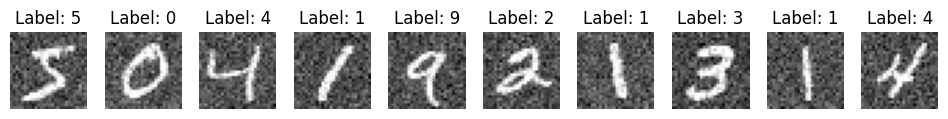

In [13]:
# 데이터 로드 및 전처리
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data()
noise_factor = 0.5
X_train = np.reshape(X_train.astype('float32') / 255, (len(X_train), 28, 28, 1))
X_train_input = np.reshape(X_train + noise_factor * np.random.normal(loc=0.0, scale=0.3, size=X_train.shape),
                           (len(X_train), 28, 28, 1))
X_train_input = np.clip(0, 1, X_train_input)
X_val = np.reshape(X_val.astype('float32') / 255 + noise_factor * np.random.normal(loc=0.0, scale=0.3, size=X_val.shape), (len(X_val), 28, 28, 1))
X_val = np.clip(0, 1, X_val)
# 학습 데이터셋에서 이미지 출력합니다.
num_images = 10
fig, axes = plt.subplots(1, num_images, figsize=(12, 1))

for i in range(num_images):
    axes[i].imshow(X_train_input[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Label: {y_train[i]}')
    axes[i].axis('off')

ds_mnist_train = tf.data.Dataset.from_tensor_slices((X_train_input, X_train))
ds_mnist_val = tf.data.Dataset.from_tensor_slices((X_val, X_val))
del X_train, X_val
plt.show()

Epoch 1/10


I0000 00:00:1763303914.424528   40922 service.cc:152] XLA service 0x7ff124011910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763303914.424552   40922 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-11-16 23:38:34.461417: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1763303914.643647   40922 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-11-16 23:38:34.874457: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_529', 8 bytes spill stores, 8 bytes spill loads

2025-11-16 23:38:35.375776: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_d

 46/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4258

I0000 00:00:1763303919.818534   40922 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1475

2025-11-16 23:38:42.016795: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_540', 56 bytes spill stores, 64 bytes spill loads

2025-11-16 23:38:42.234285: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_529', 156 bytes spill stores, 156 bytes spill loads

2025-11-16 23:38:42.664151: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_540', 8 bytes spill stores, 8 bytes spill loads

2025-11-16 23:38:42.833149: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_540', 124 bytes spill stores, 124 bytes spill loads

2025-11-16 23:39:13.441734: I external/loc

469/469 ━━━━━━━━━━━━━━━━━━━━ -14s 21ms/step - loss: 0.0750 - val_loss: 0.0545
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0310 - val_loss: 0.0450
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - loss: 0.0245 - val_loss: 0.0411
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ -28s -59878us/step - loss: 0.0212 - val_loss: 0.0387
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0189 - val_loss: 0.0370
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0173 - val_loss: 0.0358
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0160 - val_loss: 0.0349
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0150 - val_loss: 0.0342
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0142 - val_loss: 0.0336
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0135 - val_loss: 0.0331
Original images


2025-11-16 23:39:06.829432: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


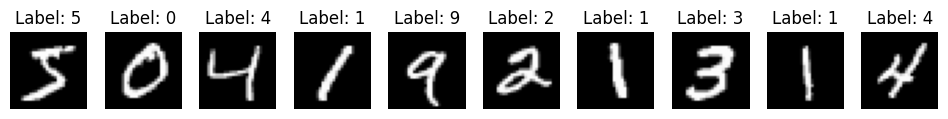

Noised images


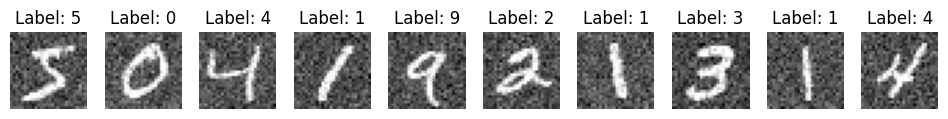

2025-11-16 23:39:07.105784: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/home/sun9sun9/python312/lib/python3.12/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_18
Received: inputs=(('Tensor(shape=(32, 28, 28, 1))', 'Tensor(shape=(32, 28, 28, 1))'),)
  warnings.warn(msg)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Denoised images


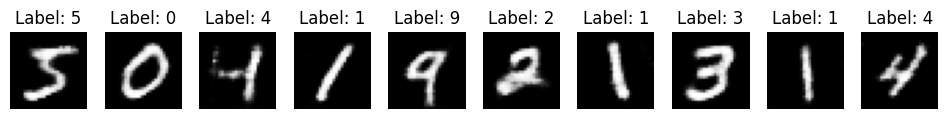

In [15]:
num_images = 10
tf.keras.backend.clear_session()
# AutoEncoder에서 Encoder 모델을 생성합니다.
encoder = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer="HeNormal"),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer="HeNormal"),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer="HeNormal"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer="HeNormal"),
    tf.keras.layers.Dense(32)
])
# AutoEncoder에서 Decoder 모델을 생성합니다.
decoder = tf.keras.models.Sequential([
    tf.keras.Input(shape=(32, )),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer="HeNormal"),
    tf.keras.layers.Dense(784, activation='relu', kernel_initializer="HeNormal"),
    tf.keras.layers.Reshape((7, 7, 16)),
    tf.keras.layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same', kernel_initializer="HeNormal"),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', kernel_initializer="HeNormal"),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same', kernel_initializer="HeNormal")
])
autoenc = tf.keras.models.Sequential([encoder, decoder])
autoenc.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
)
autoenc.fit(ds_mnist_train.batch(128), validation_data=ds_mnist_val.batch(128), epochs=10, verbose=1)

fig, axes = plt.subplots(1, num_images, figsize=(12, 1))
org = list(ds_mnist_train.take(12))
print('Original images')
for i in range(num_images):
    axes[i].imshow(org[i][1].numpy().reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Label: {y_train[i]}')
    axes[i].axis('off')
plt.show()

fig, axes = plt.subplots(1, num_images, figsize=(12, 1))
print('Noised images')
for i in range(num_images):
    axes[i].imshow(org[i][0].numpy().reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Label: {y_train[i]}')
    axes[i].axis('off')
plt.show()

prd = autoenc.predict(list(ds_mnist_train.batch(128).take(1)))
fig, axes = plt.subplots(1, num_images, figsize=(12, 1))
print('Denoised images')
for i in range(num_images):
    axes[i].imshow(prd[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Label: {y_train[i]}')
    axes[i].axis('off')
plt.show()

**[Ex.5]**

MNIST 손글씨 데이터셋을 대상으로 GAN 신경망을 구현하고, 학습시켜봅니다.

In [16]:
# 학습과 평가 구분없이 모두 학습데이터로 사용합니다.

(X_train, _), (X_train2, _) = tf.keras.datasets.mnist.load_data()
X_train = np.reshape(X_train.astype('float32') / 255, (len(X_train), 28, 28, 1))
X_train2 = np.reshape(X_train2.astype('float32') / 255, (len(X_train2), 28, 28, 1))
X_train = np.concatenate([X_train, X_train2], axis=0)
del X_train2

In [18]:
tf.keras.backend.clear_session()
latent_dim = 64
generator = tf.keras.models.Sequential([
    tf.keras.Input(shape=(latent_dim, )),
    tf.keras.layers.Dense(784, kernel_initializer="HeNormal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Reshape((7, 7, 16)),
    tf.keras.layers.Conv2DTranspose(128, (3, 3), padding='same', kernel_initializer="HeNormal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2DTranspose(64, (3, 3), padding='same', kernel_initializer="HeNormal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same', kernel_initializer="GlorotNormal")
])

discriminator = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', kernel_initializer="HeNormal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer="HeNormal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer="HeNormal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, kernel_initializer="HeNormal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer="GlorotNormal")
])

d_losses, g_losses = list(), list()

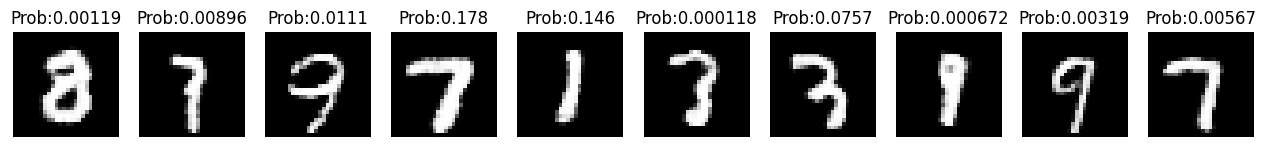

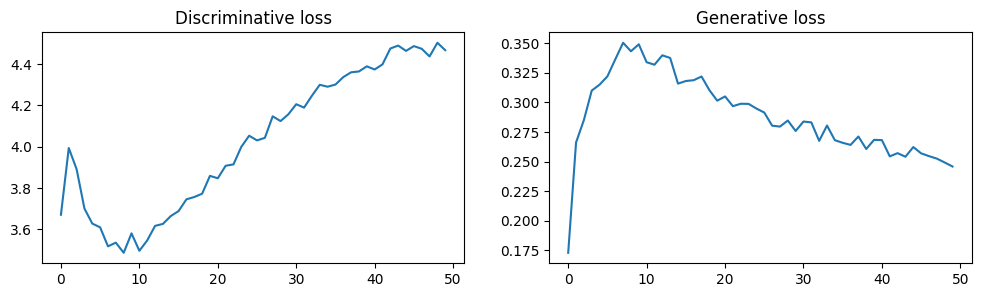

In [19]:
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
gen_optimizer = tf.keras.optimizers.Adam(1e-4)
disc_optimizer = tf.keras.optimizers.Adam(1e-4)
batch_size = 128

def discriminator_loss(real_output, fake_output):
    real_loss = bce(tf.ones_like(real_output), real_output)
    fake_loss = bce(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss
def generator_loss(fake_output):
    return bce(tf.ones_like(fake_output), fake_output)

@tf.function
def train_step(images):
    latent = tf.random.normal([batch_size, latent_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(latent, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    grad_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
    grad_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    gen_optimizer.apply_gradients(zip(grad_gen, generator.trainable_variables))
    disc_optimizer.apply_gradients(zip(grad_disc, discriminator.trainable_variables))
    return gen_loss, disc_loss

from IPython.display import clear_output
chunk = [(i, i + batch_size) for i in range(0, X_train.shape[0] - batch_size, batch_size)] + \
        [(X_train.shape[0] - batch_size, X_train.shape[0])]

for _ in range(50):
    np.random.shuffle(chunk)
    d_losses_, g_losses_ = list(), list()
    for i, (a, b) in enumerate(chunk):
        gen_loss, disc_loss = train_step(tf.constant(X_train[a:b]))
        d_losses_.append(gen_loss.numpy())
        g_losses_.append(disc_loss.numpy())
    d_losses.append(np.mean(d_losses_))
    g_losses.append(np.mean(g_losses_))

    # Display generated images
    clear_output()
    num_generated_images = 10
    latent_val = np.random.normal(0, 1, (num_images, latent_dim))
    generated_images = generator.predict(latent_val, verbose=0)
    prob = discriminator.predict(generated_images, verbose = 0)

    fig, axes = plt.subplots(1, num_generated_images, figsize=(16, 4))
    for i, ax in zip(range(num_generated_images), axes):
        ax.imshow(generated_images[i][:, :, 0], cmap='gray')
        ax.set_title('Prob:{:.3}'.format(prob[i, 0]))
        ax.axis('off')
    plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    axes[0].plot(d_losses)
    axes[0].set_title('Discriminative loss')
    axes[1].plot(g_losses)
    axes[1].set_title('Generative loss')
    plt.show()